<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_3/B_d3_Image_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autogluon.multimodal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtim

In [1]:
!pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.0+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 421.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=f0d93b227086107cb4c543b8f09208e146c9829a09b1ee0e17b432ac97f2048c
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: torch
    Found existing installation: torch 2.

In [2]:
!mim install "mmcv==2.1.0"
!pip install "mmdet==3.2.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.4 MB/s eta 0:00:00


In [3]:
from autogluon.multimodal import MultiModalPredictor

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
import os
import time
from autogluon.core.utils.loaders import load_zip

In [5]:
zip_file = "https://automl-mm-bench.s3.amazonaws.com/object_detection_dataset/tiny_motorbike_coco.zip"
download_dir = "./tiny_motorbike_coco"

load_zip.unzip(zip_file, unzip_dir=download_dir)
data_dir = os.path.join(download_dir, "tiny_motorbike")
train_path = os.path.join(data_dir, "Annotations", "trainval_cocoformat.json")
test_path = os.path.join(data_dir, "Annotations", "test_cocoformat.json")

100%|██████████| 21.8M/21.8M [00:00<00:00, 21.9MiB/s]


In [6]:
presets = "medium_quality"

In [7]:
# Init predictor
import uuid

model_path = f"./tmp/{uuid.uuid4().hex}-quick_start_tutorial_temp_save"

predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path=model_path,
)

In [8]:
start = time.time()
predictor.fit(train_path)  # Fit
train_end = time.time()

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.0.0+cu118
CUDA Version:       11.8
Memory Avail:       10.86 GB / 12.67 GB (85.7%)
Disk Space Avail:   WARNING, an exception (FileNotFoundError) occurred while attempting to get available disk space. Consider opening a GitHub Issue.
Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!



AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save
    ```

INFO: Seed set to 0


Loads checkpoint by local backend from path: yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth


GPU Count: 1
GPU Count to be Used: 1
GPU 0 Name: Tesla T4
GPU 0 Memory: 0.25GB/15.0GB (Used/Total)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: `Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                             | Params | Mode 
-------------------------------------------------------------------------------
0 | model             | MMDetAutoModelForObjectDetection | 54.2 M | train
1 | validation_metric | MeanAveragePrecision             | 0      | train
-------------------------------------------------------------------------------
54.2 M    Trainable params
0         Non-trainable params
54.2 M    Total params
216.620   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 15: 'val_map' reached 0.32850 (best 0.32850), saving model to '/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/epoch=2-step=15.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 30: 'val_map' reached 0.36385 (best 0.36385), saving model to '/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/epoch=5-step=30.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 45: 'val_map' reached 0.38087 (best 0.38087), saving model to '/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/epoch=8-step=45.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 60: 'val_map' reached 0.39243 (best 0.39243), saving model to '/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/epoch=11-step=60.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 75: 'val_map' reached 0.40350 (best 0.40350), saving model to '/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/epoch=14-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 90: 'val_map' reached 0.44950 (best 0.44950), saving model to '/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/epoch=17-step=90.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 20, global step 105: 'val_map' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 23, global step 120: 'val_map' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 26, global step 135: 'val_map' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 29, global step 150: 'val_map' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 32, global step 165: 'val_map' was not in top 1
AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [9]:
print("This finetuning takes %.2f seconds." % (train_end - start))

This finetuning takes 824.80 seconds.


In [10]:
predictor.evaluate(test_path)
eval_end = time.time()

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Predicting: |          | 0/? [00:00<?, ?it/s]

A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels/ag-20240929_062206"


saving file at /content/AutogluonModels/ag-20240929_062206/object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.539
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.397
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.686
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.242
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=  

In [11]:
print("The evaluation takes %.2f seconds." % (eval_end - train_end))

The evaluation takes 108.34 seconds.


In [12]:
# Load and reset num_gpus
new_predictor = MultiModalPredictor.load(model_path)
new_predictor.set_num_gpus(1)

Load pretrained checkpoint: /content/tmp/6406b027726a4917a0e1db573f59a4cf-quick_start_tutorial_temp_save/model.ckpt


In [13]:
# Evaluate new predictor
new_predictor.evaluate(test_path)

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Predicting: |          | 0/? [00:00<?, ?it/s]

A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels/ag-20240929_062301"


saving file at /content/AutogluonModels/ag-20240929_062301/object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.539
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.397
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.686
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.242
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=  

{'map': 0.36388301924093874,
 'mean_average_precision': 0.36388301924093874,
 'map_50': 0.5393544920414799,
 'map_75': 0.3974293319194547,
 'map_small': 0.21848992606027517,
 'map_medium': 0.48645295875409567,
 'map_large': 0.6864948627241035,
 'mar_1': 0.24221376556260274,
 'mar_10': 0.40927789523138364,
 'mar_100': 0.4332013154803853,
 'mar_small': 0.30333333333333334,
 'mar_medium': 0.562063492063492,
 'mar_large': 0.7754925775978407}

In [14]:
pred = predictor.predict(test_path)
print(pred)

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Predicting: |          | 0/? [00:00<?, ?it/s]

                                                image  \
0   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
1   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
2   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
3   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
4   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
5   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
6   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
7   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
8   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
9   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
10  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
11  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
12  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
13  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
14  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
15  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
16  ./tiny_motorbike_coco/tiny_

In [15]:
pred = predictor.predict(test_path, save_results=True)

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Predicting: |          | 0/? [00:00<?, ?it/s]

A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels/ag-20240929_062347"
Saved detection results to /content/AutogluonModels/ag-20240929_062347/result.txt


In [16]:
!pip install opencv-python

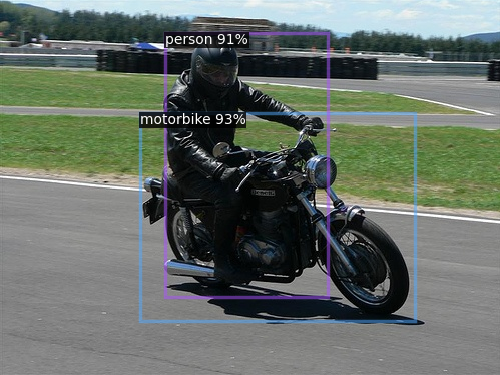

In [17]:
from autogluon.multimodal.utils import ObjectDetectionVisualizer

conf_threshold = 0.4  # Specify a confidence threshold to filter out unwanted boxes
image_result = pred.iloc[30]

img_path = image_result.image  # Select an image to visualize

visualizer = ObjectDetectionVisualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

In [18]:
from autogluon.multimodal import download
image_url = "https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/detection/street_small.jpg"
test_image = download(image_url)

In [19]:
import json

# create a input file for demo
data = {"images": [{"id": 0, "width": -1, "height": -1, "file_name": test_image}], "categories": []}
os.mkdir("input_data_for_demo")
input_file = "input_data_for_demo/demo_annotation.json"
with open(input_file, "w+") as f:
    json.dump(data, f)

pred_test_image = predictor.predict(input_file)
print(pred_test_image)

Using default root folder: input_data_for_demo/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Predicting: |          | 0/? [00:00<?, ?it/s]

                                     image  \
0  input_data_for_demo/../street_small.jpg   

                                              bboxes  
0  [{'class': 'bicycle', 'class_id': 0, 'bbox': [...  


In [20]:
pred_test_image = predictor.predict([test_image])
print(pred_test_image)

Predicting: |          | 0/? [00:00<?, ?it/s]

              image                                             bboxes
0  street_small.jpg  [{'class': 'bicycle', 'class_id': 0, 'bbox': [...
